# Optimización escalar con SymPy: criterio conocido

Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.

In [30]:
# Primero importamos las librerías que se usarán:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
# Declaramos x como variable
x = sym.var('x')

1. $f(x)=x+\frac{1}{x^2}$

In [31]:
# Declaramos f1 y obtenemos la función numérica con lambdify
f1 = x + 1/x**2
f1_num = sym.lambdify(x, f1, 'numpy')
f1

x + x**(-2)

2. $f(x)=1260+117x-9x^2$

In [32]:
# Declaramos f2 y obtenemos la función numérica con lambdify
f2 = 1260 + 117*x - 9*x**2
f2_num = sym.lambdify(x, f2, 'numpy')
f2

-9*x**2 + 117*x + 1260

3. $f(x)=5+x+\frac{4}{x}$, para $x>0$

In [33]:
# Declaramos f3 y obtenemos la función numérica con lambdify
f3 = 5 + x + 4/x
f3_num = sym.lambdify(x, f3, 'numpy')
f3

x + 5 + 4/x

4. $f(x)=\frac{15x}{2}\sqrt{\frac{x}{x-30}}$

In [34]:
# Declaramos f4 y obtenemos la función numérica con lambdify
f4 = 15*x/2 * sym.sqrt(x/(x-30))
f4_num = sym.lambdify(x, f4, 'numpy')
f4

15*x*sqrt(x/(x - 30))/2

5. $f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [35]:
# Declaramos f5 y obtenemos la función numérica con lambdify
f5 = 6 - 2*x + sym.sqrt(18 - 2*x**2)
f5_num = sym.lambdify(x, f5, 'numpy')
f5

-2*x + sqrt(18 - 2*x**2) + 6

6. $f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [36]:
# Declaramos f6 y obtenemos la función numérica con lambdify
f6 = 1/4*x**4 + 1/3*x**3 - x**2
f6_num = sym.lambdify(x, f6, 'numpy')
f6

0.25*x**4 + 0.333333333333333*x**3 - x**2

7. $f(x)=100(1+\cos(x)\sin(x))$, para $x\in[0.\frac{\pi}{2}]$

In [37]:
# Declaramos f7 y obtenemos la función numérica con lambdify
f7 = 100*(1 + sym.cos(x)*sym.sin(x))
f7_num = sym.lambdify(x, f7, 'numpy')
f7

100*sin(x)*cos(x) + 100

### Ahora que ya declaramos todas las funciones, resolvemos cada una un un cuadro de código para poder reutilizar variables y no exceder el tamaño de este erchivo:
NOTA: Se reusó el mismo código para cada función, únicamente se modifica la entrada inicial para especificar cual de las 7 ecuaciones se quiere resolver, además de especificar el rango de $x$ y el nombre con el que se quiere guardar la imagen de la gráfica.


> Efectivamente, declaré con lambdify en vano cada función porque aqui se generaliza :)



-100*sin(x)**2 + 100*cos(x)**2
El o los puntos son: [-0.7853981633974483, 0.7853981633974483]
El punto crítico -0.7853981633974483 es un mínimo
El punto crítico 0.7853981633974483 es un máximo


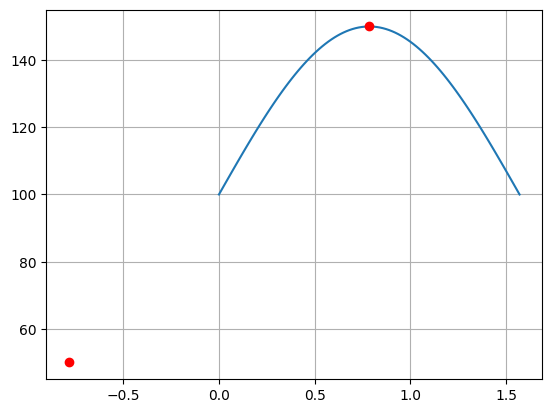

In [49]:
"""___________AQUI SE MODIFICA LA FUNCIÓN___________"""
f = f7

f_num = sym.lambdify(x, f, 'numpy') # Numerizamos a numpy con lambdify

# Paso 1 Derivadas de f
f_prime = f.diff(x) # Primera derivada
print(f_prime)
f_2prime = f_prime.diff(x) # Segunda derivada

# Paso 2 gregamos a un arreglo los puntos críticos calculados por sympy
cdots = sym.solve(f_prime, x) # Puntos críticos

# Paso 3 Filtramos las soluciones para quedarnos solo con las reales
realc = [float(sol) for sol in cdots if sol.is_real]
print(f'El o los puntos son: {realc}')

# Le decimos al usiario sin son máximos o mínimos (f(c)>0 ... mínimo, f(c)<0 ... máximo)
f_2prime_num = sym.lambdify(x, f_2prime, 'numpy') # Aquí le decimos que use numpy para la función f_2prime que era simbolica
for i in realc:
    try:
        if f_2prime_num(i) > 0:
            print(f'El punto crítico {i} es un mínimo')
        elif f_2prime_num(i) < 0:
            print(f'El punto crítico {i} es un máximo')
        elif f_2prime_num(i) == 0:
            print(f'El punto crítico {i}, no aplica para el criterio de la segunda derivada') # GUARDAMOS PARA FUTURAS MODIFICACIONES (Automatizar por metodo gráfico)
    except (TypeError, ValueError):
        print(f'El punto crítico {i} no aplica para el criterio de la segunda derivada por indeterminación.')


"""___________AQUI SE MODIFICAN LOS INTERVALOS___________"""

# Comenzamos con x_min y x_max
x_num = np.linspace(0, np.pi/2, 100)
# Ahora con la función evaluada
y_num = f_num(x_num)

# Ahora creamos la gráfica, teniendo los datos de cada 'y' para cada 'x'
plt.plot(x_num, y_num) # Aquí generamos la gráfica
for i in realc: # Para cada punto crítico
  plt.plot(i, f_num(i), 'ro') # Aquí generamos los puntos críticos y remarcamos con círculos rojos
plt.grid() # Agregamos la cuadrícula
plt.savefig("Funcion_7.png") # Mostramos la gráfica
